# Age

In [18]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point


Clean up the csv

In [19]:
age = pd.read_excel('../Data/Census_2023_MedianAgeEstimates_forVA.xlsx', skiprows = 5)

In [20]:
age.head()

,Locality,FIPS Code,Both Sexes,Male,Female
0,Accomack County,1,47.6,45.3,49.4
1,Albemarle County,3,40.3,39.1,41.5
2,Alleghany County,5,49.1,47.4,50.7
3,Amelia County,7,44.2,42.8,45.7
4,Amherst County,9,43.8,42.6,44.9


In [21]:
gdf = gpd.read_file('../Data/VirginiaAdministrativeBoundary_ClippedToShoreline/VirginiaCounty_ClippedToShoreline.shp')
gdf.head()

,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,Shape_Area,geometry
0,51001,1480091,Accomack,Accomack County,T,N,2014/08/20,CO,1195.366291,4.949957e+06,1.122306e+09,"MULTIPOLYGON (((335025.3 168192.902, 335027.85..."
1,51003,1675170,Albemarle,Albemarle County,L,Y,2021/03/29,CO,725.634334,2.310198e+05,1.879384e+09,"POLYGON ((99081.251 243000.641, 99436.591 2428..."
2,51005,1492459,Alleghany,Alleghany County,V,N,2014/09/15,CO,449.544769,2.062654e+05,1.164316e+09,"POLYGON ((-12982.332 208054.135, -12964.873 20..."
3,51007,1497770,Amelia,Amelia County,T,Y,2021/03/29,CO,360.945234,1.776617e+05,9.348439e+08,"POLYGON ((145558.574 158736.418, 145563.999 15..."
4,51009,1480095,Amherst,Amherst County,V,N,2020/09/11,CO,478.766949,1.876610e+05,1.240001e+09,"POLYGON ((55734.089 171342.588, 55732.855 1713..."


In [22]:
def clean_name(name):
    name = name.lower()
    name = name.replace('city of ', '')
    name = name.replace('city', '')
    name = name.replace('town of ', '')
    name = name.replace('town', '')
    return name

age['Locality'] = age['Locality'].apply(clean_name)
gdf['NAMELSAD'] = gdf['NAMELSAD'].apply(clean_name)

In [23]:
merged_gdf = age.merge(gdf, left_on="Locality", right_on="NAMELSAD", how="right")
merged_gdf = merged_gdf.dropna(subset=['Locality'])
merged_gdf

,Locality,FIPS Code,Both Sexes,Male,Female,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,Shape_Area,geometry
0,accomack county,1,47.6,45.3,49.4,51001,1480091,Accomack,accomack county,T,N,2014/08/20,CO,1195.366291,4.949957e+06,1.122306e+09,"MULTIPOLYGON (((335025.3 168192.902, 335027.85..."
1,albemarle county,3,40.3,39.1,41.5,51003,1675170,Albemarle,albemarle county,L,Y,2021/03/29,CO,725.634334,2.310198e+05,1.879384e+09,"POLYGON ((99081.251 243000.641, 99436.591 2428..."
2,alleghany county,5,49.1,47.4,50.7,51005,1492459,Alleghany,alleghany county,V,N,2014/09/15,CO,449.544769,2.062654e+05,1.164316e+09,"POLYGON ((-12982.332 208054.135, -12964.873 20..."
3,amelia county,7,44.2,42.8,45.7,51007,1497770,Amelia,amelia county,T,Y,2021/03/29,CO,360.945234,1.776617e+05,9.348439e+08,"POLYGON ((145558.574 158736.418, 145563.999 15..."
4,amherst county,9,43.8,42.6,44.9,51009,1480095,Amherst,amherst county,V,N,2020/09/11,CO,478.766949,1.876610e+05,1.240001e+09,"POLYGON ((55734.089 171342.588, 55732.855 1713..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,suffolk,800,38.4,37.2,39.5,51800,1498560,Suffolk,suffolk,L,Y,2017/06/23,CI,428.933821,6.716418e+05,1.055535e+09,"MULTIPOLYGON (((262177.139 86912.233, 262177.0..."
129,virginia beach,810,38.2,36.8,39.7,51810,1498559,Virginia Beach,virginia beach,L,Y,2017/01/25,CI,408.144012,1.350634e+06,6.461162e+08,"MULTIPOLYGON (((310101.26 66996.538, 310107.55..."
130,waynesboro,820,39.0,37.3,40.7,51820,1498443,Waynesboro,waynesboro,L,Y,2014/06/16,CI,15.110987,3.244646e+04,3.913728e+07,"POLYGON ((52750.613 232999.672, 53088.146 2328..."
131,williamsburg,830,26.4,26.5,26.2,51830,1789076,Williamsburg,williamsburg,L,Y,2017/01/25,CI,9.032769,4.150800e+04,2.324663e+07,"MULTIPOLYGON (((247496.873 142380.179, 247499...."


In [24]:
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry="geometry", crs=gdf.crs)

<Axes: >

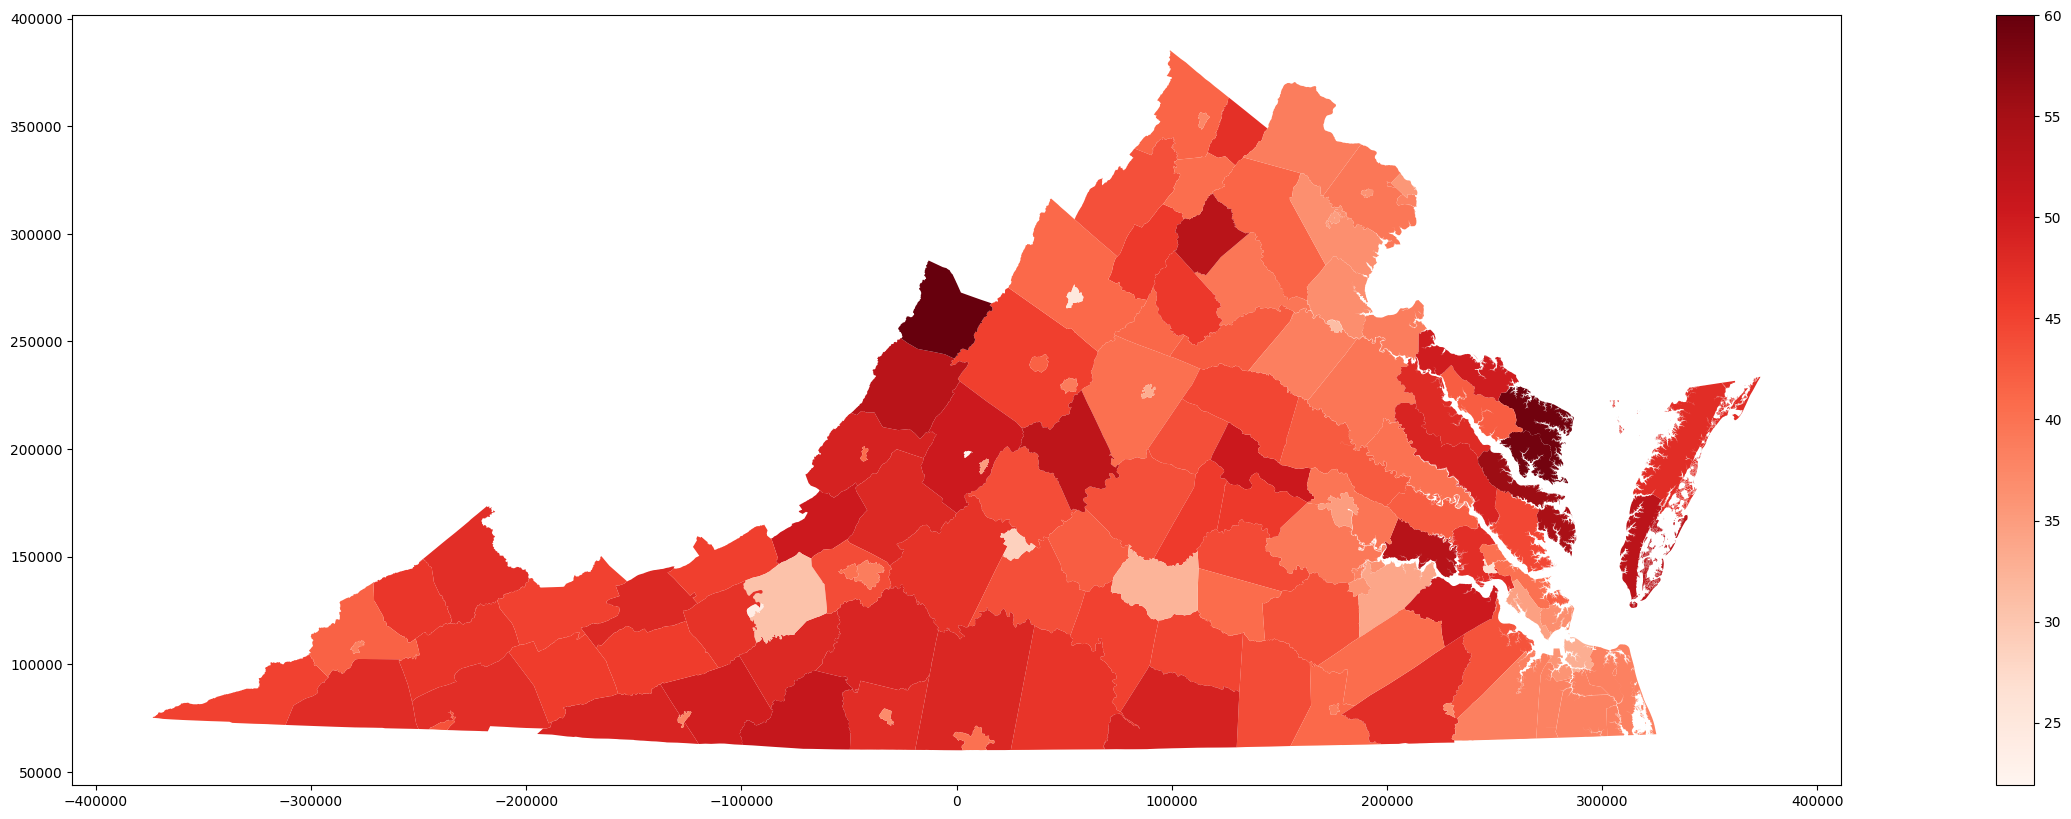

In [25]:
fig, ax = plt.subplots(figsize=(40, 10))
merged_gdf.plot(
    column='Both Sexes',
    cmap='Reds',
    legend=True,
    #edgecolor='black',
    ax=ax
)